### Name: Ali Asghar Yousuf
### ID: ay06993

# healthcare-stroke-data-1.csv

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
file_name = 'healthcare-stroke-data-1.csv'
df = pd.read_csv(file_name)

Q1. Display the data types of each column

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  fat_percentage     4909 non-null   float64
 11  smoking_status     5110 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 479.2+ KB


Q2. Find the columns with missing values by displaying the total number of records for each column.

In [114]:
# df['smoking_status'].replace('?', np.nan, inplace=True)
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
fat_percentage       201
smoking_status         0
dtype: int64

Q3. If there are missing values in any column, replace it with appropriate method of your choice. Explain why did you choose this method? Display the missing value again to show that there are no missing values exist

There are missing values in bmi and fat_percentage columns. I have replaced the missing values with the mean of the column for bmi and fat_percentage. I have chosen this method because the mean is the average of the values and it is the most appropriate method to replace the missing values.

<!-- I have replaced the missing values in smoking_status with the mode of the column. I have chosen this method because the mode is the most frequently occuring value in the column and it is the most appropriate method to replace the missing values. -->

In [115]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
# df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)
df['fat_percentage'].fillna(df['fat_percentage'].mean(), inplace=True)
df.isnull().sum()
# df.head()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
fat_percentage       0
smoking_status       0
dtype: int64

Q4. Replace the **'?'** present in the **smoking_status** column with the label **'unknown'**

In [116]:
df['smoking_status'].replace('?', 'unknown', inplace=True)

Q5. Find the percentage of Females present in the column gender

In [117]:
females = df['gender'][df['gender'] == 'Female'].count()
total = df['gender'].count()
per = females/total * 100
print('Percentage of females present in the gender column is: ', str(per) + '%')


Percentage of females present in the gender column is:  58.590998043052835%


Q6. Find all the records which have avg_glucose_level greater than 200

In [118]:
df[df['avg_glucose_level'] > 200]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,fat_percentage,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,43.13000,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,28.33092,never smoked
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,28.893237,28.33092,unknown
14,5317,Female,79.0,0,1,Yes,Private,Urban,214.09,28.200000,35.81000,never smoked
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.800000,32.01000,smokes
...,...,...,...,...,...,...,...,...,...,...,...,...
5029,66951,Female,72.0,0,0,Yes,Private,Urban,206.49,26.300000,31.92000,never smoked
5034,65405,Female,79.0,0,0,No,Private,Urban,253.86,28.800000,36.53000,formerly smoked
5035,49773,Female,78.0,0,0,Yes,Private,Urban,203.36,28.700000,36.18000,formerly smoked
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.300000,31.99000,never smoked


Q7. What is the Average bmi of people whose smoking_status shows **never smoked**?

In [119]:
bmi = df['bmi'][df['smoking_status'] == 'never smoked'].mean()
print('The average bmi of people who have never smoked is: ', bmi)

The average bmi of people who have never smoked is:  29.959529321602425


Q8. Find the Max avg_glucose level and Min avg_glucose level record for the people whose smoking_status shows **smokes** 

In [120]:
max_glucose = df['avg_glucose_level'][df['smoking_status'] == 'smokes'].max()
min_glucose = df['avg_glucose_level'][df['smoking_status'] == 'smokes'].min()
print('The max avg_glucose level for people who smoke is: ', max_glucose)
print('The min avg_glucose level for people who smoke is: ', min_glucose)

The max avg_glucose level for people who smoke is:  271.74
The min avg_glucose level for people who smoke is:  55.32


Q9. Use any visualization technique (think of any suitable plot) which can justify/show that "As the fat_percentage increases, the bmi also increases proportionally". Explain your findings in that plot.

<Axes: title={'center': 'Fat Percentage vs BMI'}, xlabel='fat_percentage', ylabel='bmi'>

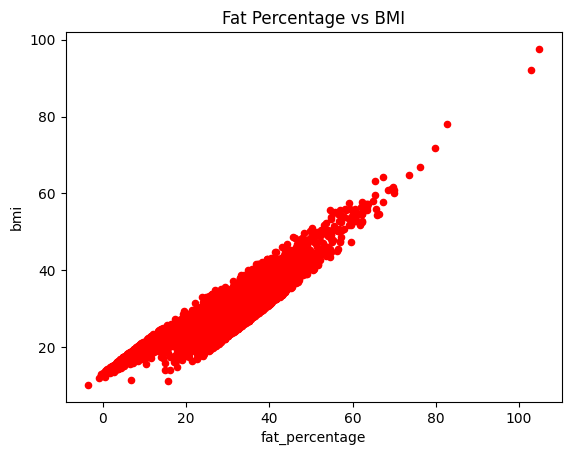

In [121]:
df.plot.scatter(x='fat_percentage', y='bmi', c='red', title='Fat Percentage vs BMI')

We see a very strong correlation between the fat_percentage and bmi. As the fat_percentage increases, the bmi also increases proportionally.

Q10. Generate a correlation plot and validate the results of previous question. Explain how do you validate it?

In [122]:
# generate a correlation plot and valide the correlation between fat_percentage and bmi
df['fat_percentage'].corr(df['bmi'])


0.9158313622260137

0.9158 shows a very strong correlation between the fat_percentage and bmi. This validates the results of the previous question.

Text(0.5, 1.0, 'Fat Percentage vs BMI')

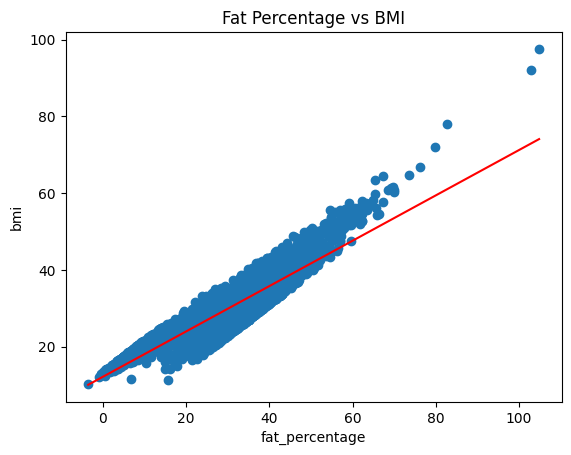

In [123]:
# plotting the data
x, y = df['fat_percentage'], df['bmi']
plt.scatter(x, y)

# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
		(np.unique(x)), color='red')
plt.xlabel('fat_percentage')
plt.ylabel('bmi')
plt.title('Fat Percentage vs BMI')

We can further validate the results by looking at this plot.

Q11. Also find another interesting insights from correlation plot (other than fat_percentage and bmi)

In [146]:
# generate a correlation plot and valide the correlation between fat_percentage and bmi
df['avg_glucose_level'].corr(df['age'])


0.23817111410174327

<Axes: title={'center': 'avg_glucose_level vs age'}, xlabel='avg_glucose_level', ylabel='age'>

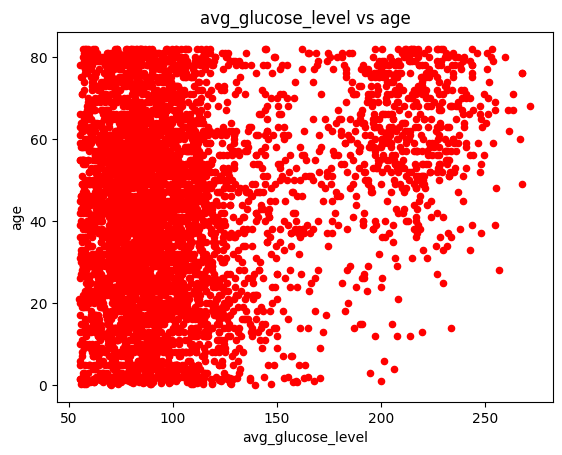

In [147]:
df.plot.scatter(x='avg_glucose_level', y='age', c='red', title='avg_glucose_level vs age')

In [149]:
# draw a correlation matrix
df.corr()

C:\Users\ali\AppData\Local\Temp\ipykernel_24344\2521666946.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,fat_percentage
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006042
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.668630
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.235536
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.133107
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.227171
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.915831
fat_percentage,0.006042,0.668630,0.235536,0.133107,0.227171,0.915831,1.000000


We see a strong correlation between fat_percentage and age

Q12. Use a boxplot visualisation technique to see the highest and lowest **fat_percentage** with the marital status (**ever_married**)?

<Axes: xlabel='fat_percentage', ylabel='ever_married'>

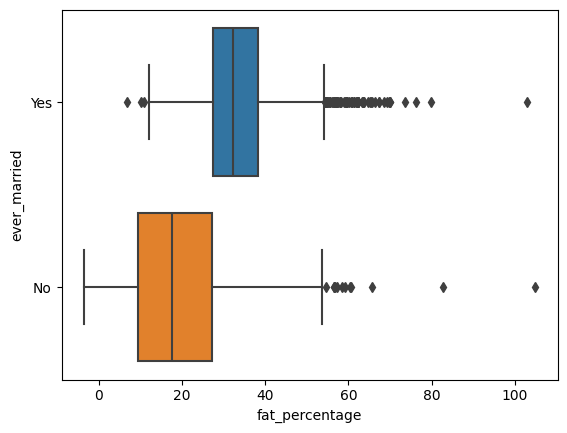

In [124]:
# Use a boxplot visualisation technique to see the highest and lowest fat_percentage with the marital status ever_married?
sns.boxplot(x='fat_percentage', y='ever_married', data=df)

The lowest fat percentage for non married people is lower than the lowest fat percentage for married people. The highest fat percentage for non married people is lower than the highest fat percentage for married people except for one outlier.

# healthcare-stroke-data-2.csv

In [125]:
file_name2 = 'healthcare-stroke-data-2.csv'
df2 = pd.read_csv(file_name2)

Q13. Join second dataset with first dataset to include the **stroke** column. Find the common column to merge these datasets.

In [126]:
df_new = pd.merge(df, df2, on='id', how='inner')

Q14. Count the number of records for each **stroke** type

In [127]:
# count the number of records for each stroke type
df_new['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Q15. Replace stroke = 0 to 'No' and stroke = 1 to 'Yes' categories. Count the values again to check if it matches with the previous question

In [128]:
# Q15. Replace stroke = 0 to 'No' and stroke = 1 to 'Yes' categories. Count the values again to check if it matches with the previous question
df_new['stroke'].replace(0, 'No', inplace=True)
df_new['stroke'].replace(1, 'Yes', inplace=True)

Q16. Make a Distribution plot for **age** and **stroke** together and provide insights on it.

C:\Users\ali\AppData\Local\Temp\ipykernel_24344\3047744163.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['age'][df_new['stroke'] == 'Yes'], color='red')


<Axes: xlabel='age', ylabel='Density'>

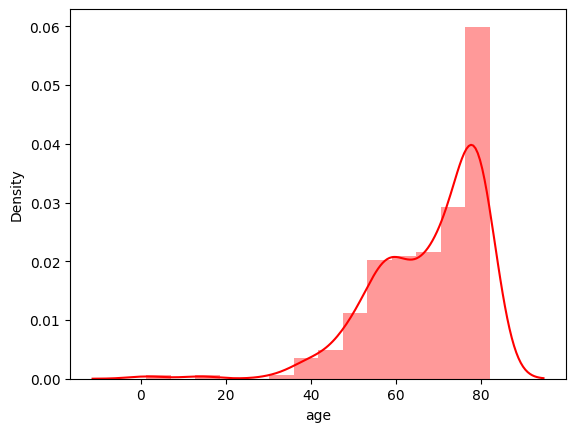

In [135]:
# Q16. Make a Distribution plot for **age** and **stroke** together and provide insights on it.
sns.distplot(df_new['age'][df_new['stroke'] == 'Yes'], color='red')


we can see that as age increases, the number of people having stroke also increases. This shows that age is a factor in stroke.
we see the first significant increase in the number of people having stroke at the age of 40. We also notice that beyond the age of 70, the number of people having stroke skyrockets.

Q17. Make a Distribution plot for **work_type** and **stroke** together and provide insights on it.

We cant make a distribution plot for work_type and stroke together because work_type is a categorical variable and stroke is a numerical variable. but we can make a countplot for work_type and stroke together.

<Axes: xlabel='work_type', ylabel='count'>

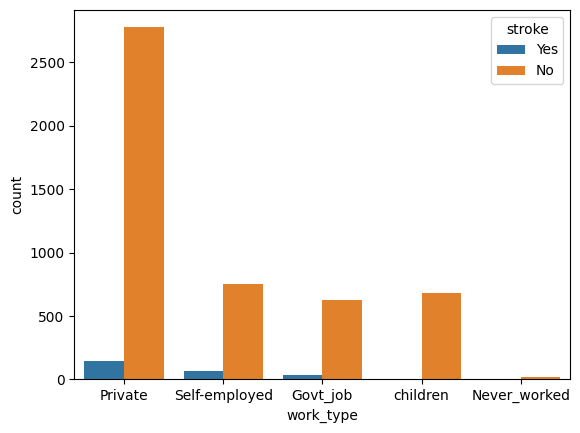

In [140]:
sns.countplot(x='work_type', hue='stroke', data=df_new)

We don't see any significant difference in the number of people having stroke based on their work_type. This shows that work_type is not a factor in stroke. The number of people having stroke is higher in private work_type but the number of people working in private work_type is also higher than other work_types so this is not a significant difference.

Q18. Find the number of patients for each **gender** and **work_type**. Sort them in ascending order.

In [130]:
# Q18. Find the number of patients for each **gender** and **work_type**. Sort them in ascending order.
df_new['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Q19. Test the Hypothesis and explain your findings: <br> H0: the fat_percentage of **stroke** = Yes and **stroke** = No is same (equal or similar). <br>
Ha: the fat_percentage of **stroke** = Yes is greater than **stroke** = No <br>

In [132]:
stroke_yes = df_new[df_new['stroke'] == 'Yes']['fat_percentage']
stroke_no = df_new[df_new['stroke'] == 'No']['fat_percentage']

t_stat, p_value = stats.ttest_ind(stroke_yes, stroke_no, alternative='greater')
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

T-statistic: 8.718616913648058
P-value: 1.8768795501615576e-18
Reject null hypothesis


Since our p-value is less than 0.05, we reject the null hypothesis. This means that the fat_percentage of stroke = Yes is greater than stroke = No.

Q20. Test the Hypothesis and explain your findings: <br> H0: **gender** and **stroke** are independent and are not related to each other <br>
Ha: **gender** and **stroke** are dependent and related to each other <br>

In [133]:
# Q20. Test the Hypothesis and explain your findings: <br> H0: **gender** and **stroke** are independent and are not related to each other <br>
# Ha: **gender** and **stroke** are dependent and related to each other <br>
contingency_table = pd.crosstab(df_new['gender'], df_new['stroke'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print("Chi value:", chi2)
print("P-value:", p_value)


Chi value: 0.47258662884530234
P-value: 0.7895490538408245


Since our p-value is greater than 0.05, we accept the null hypothesis that gender and stroke are independent and are not related to each other